## 0. Carregamento das bibliotecas

In [4]:
# Manipulacao de dados
import numpy as np
import pandas as pd

# Visualizacao de dados
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import scikitplot as skplt

# Machine learning 
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# balanceamento
from imblearn.under_sampling import RandomUnderSampler

# Grid e Random Search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

# Metricas de avaliacao
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix



## 1. Carregamento dos dados

Após ter os dados pré-processados, podemos começar a construir nosso modelo.

In [5]:
df = pd.read_csv("covid_11_marco_pre_process.csv", sep=';')

## 2. Treino e teste

Antes de dividirmos nossos dados, vamos verificar o balanceamento dos mesmos.

#### 2.1 Como lidar com dados desbalanceados

Alguns exemplos de situações onde o desbalanceamento é quase certo são problemas de detecção de fraude e diagnóstico médicos - é intuitivo pensar que existem mais transações lícitas que criminosas, ou que o conjunto de pessoas diagnosticadas com câncer é bem menor que o conjunto de pessoas sem a doença.

Ignorar esse fato e treinar um algoritmo em cima do conjunto de dados original, pulando uma etapa intermediária de balanceamento dos dados, pode ter impactos diretos no seu projeto de Data Science.

#### 2.2 Consequências dos dados desbalanceados
Se você está construindo um modelo de machine learning para classificação, por exemplo, a consequência desse desequilíbrio é que o modelo terá uma tendência a dar muitos "alarmes falsos".

Ou seja, na prática ele irá responder muito bem entradas para as classes majoritárias, mas terá um desempenho inferior para as minoriárias.

No exemplo de detecção de fraude com cartões de crédito (onde o número de transações financeiras normais é bem maior que o número de transações fraudulentas), um classificador tenderá a apresentar muitos falsos negativos - uma situação indesejável para um banco, obviamente.

Em um trade-off, seria preferível "errar para mais" e ter uma quantidade maior de falsos positivos. Aliás, aposto que você já teve seu cartão bloqueado preventivamente e teve que ligar no banco para confirmar as últimas compras que havia feito, não é mesmo?!

Teoricamente, um dataset que possua qualquer classe com mais de 50% das entradas já é considerado desbalanceado. No entanto, há situações extremas onde você vai encontrar proporções maiores que 99:1.

Existem várias abordagens para lidar com dados desbalanceados, cada uma com seus prós e contras. Neste artigo, irei mostrar alguns dos métodos mais populares para você incluir desde já no seu arsenal.

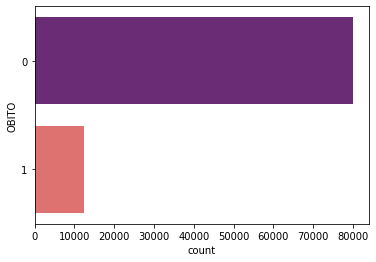

In [7]:
sns.countplot(y='OBITO', data=df, palette="magma");

In [9]:
(df['OBITO'].sum()/df.shape[0]) * 100

13.47997926655436

Podemos ver que o nosso conjunto de dados está desbalanceado. Mais precisamente, apenas 13.47% dos dados são Óbitos. Se construíssemos um modelo preditivo que classificasse os dados apenas como 0 (Recuperado), teríamos um modelo com 86.53% de acurácia. Queremos evitar esse "comportamento ingênuo".

Para isso, podemos usar abordagens que levam em conta apenas a avaliação do modelo, ou técnicas para rebalanceamento como a **undersampling**, que consiste em reamostrar a classe majoritária (nesse caso, recuperado) e manter apenas uma parte desses pontos.

![under sampling](resampling.png)

#### *tradeoff*
Ao usar um método de reamostragem (por exemplo, para obter tantos dados de ÓBITO quanto de RECUPERADOS), mostramos as proporções erradas das duas classes para o classificador durante o treinamento. O classificador treinado dessa maneira terá uma precisão menor nos dados de teste reais futuros do que o classificador treinado no conjunto de dados inalterado. Na verdade, as verdadeiras proporções das classes são importantes para saber para classificar um novo ponto e essa informação foi perdida ao reamostrar o conjunto de dados. 

[Handling imbalanced datasets in machine learning](https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28)

#### 2.3 Divisão treino e teste e balanceamento

Vamos utilizar o `train_test_split` com 30% dos dados para test, e random_state em 42, para replicabilidade do código.

Para balanceamento, utilizaremo do `RandomUnderSampler` do imblearn.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('OBITO', axis=1), df['OBITO'], test_size=0.3, random_state=42)

In [11]:
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

/home/gustavocrod/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


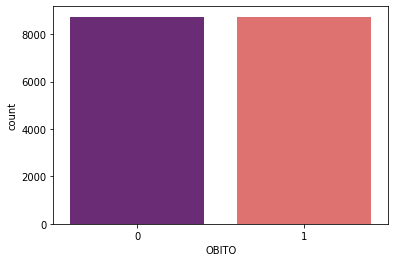

In [12]:
sns.countplot(y_train_rus, palette='magma');

# Algoritmos de aprendizagem de máquina

Vamos utilizar esses algoritmos:

 - KNN
 - Logistic Regression
 - Random Forest
 - Naive Bayes
 - Stochastic Gradient Decent
 - Linear SVC
 - Decision Tree
 - Gradient Boosted Trees
 